# Brain Age Gap Investigation

In [1]:
import pandas as pd
import numpy as np
import importlib
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

Load saved overview of IDs, metadata, predictions, and BAGs:

In [2]:
# save path for predictions
overview_path = '/ritter/share/projects/laura_riedel_thesis/predictions/predictions_overview_100-500p.csv'
# load data overview
data_overview_full = pd.read_csv(overview_path)
# limit to IDs present in heldout test set
data_overview_heldout = data_overview_full[data_overview_full['split']=='heldout_test'].copy()
data_overview_heldout.reset_index(inplace=True,drop=True)

Linearly detrend BAGs:

In [3]:
data_overview_heldout = utils.detrend_bag(data_overview_heldout, models=['orig','new'])
data_overview_heldout

,eid,age,split,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,...,genetic pc 2,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new,bag_orig_detrended,bag_new_detrended
0,1000030,65,heldout_test,21.2569,NaN,20.0,8.0,18.0,1.0,1.0,...,4.109090,-0.344172,1.0,64.256958,1.0,71.693298,-0.743042,6.693298,-0.697239,6.759642
1,1000059,68,heldout_test,NaN,22.0,20.0,7.0,NaN,0.0,0.0,...,4.809360,-1.093500,18.0,58.876446,18.0,58.413288,-9.123554,-9.586712,-7.597349,-8.031745
2,1000077,58,heldout_test,33.4834,18.0,19.0,3.0,48.0,NaN,NaN,...,3.185920,0.260200,34.0,63.836048,34.0,66.193604,5.836048,8.193604,2.427579,4.786494
3,1000100,57,heldout_test,23.4552,NaN,20.0,NaN,28.0,0.0,0.0,...,0.876031,-4.452460,2.0,55.072990,2.0,57.406872,-1.927010,0.406872,-5.828947,-3.496446
4,1000202,67,heldout_test,26.6846,19.0,20.0,6.0,45.0,NaN,NaN,...,2.064990,-4.424320,16.0,64.058601,16.0,67.427048,-2.941399,0.427048,-1.908661,1.485807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2035762,73,heldout_test,25.3688,12.0,7.0,5.0,24.0,0.0,0.0,...,2.648290,-2.457690,7.0,77.852402,7.0,74.190857,4.852402,1.190857,8.845944,5.226862
4996,2264650,61,heldout_test,30.5389,NaN,7.0,NaN,41.0,0.0,0.0,...,4.967310,-3.327250,29.0,61.950256,29.0,63.557865,0.950256,2.557865,-0.977811,0.639379
4997,2329354,68,heldout_test,22.5614,18.0,20.0,8.0,30.0,0.0,0.0,...,NaN,NaN,36.0,66.802460,36.0,65.315231,-1.197540,-2.684769,0.328665,-1.129802
4998,2457356,60,heldout_test,29.6270,18.0,20.0,8.0,22.0,1.0,1.0,...,NaN,NaN,9.0,61.610027,9.0,63.635746,1.610027,3.635746,-0.811507,1.221052


Age mean in heldout test set:

In [4]:
np.mean(data_overview_heldout['age'])

63.8966

In [5]:
true_age_corrs = viz.preds_corr_overview(data_overview_heldout, variables=False, models=['orig','new'])
true_age_corrs

,True age vs.,Corr
0,Predicted age orig model,0.698633
1,BAG orig model,-0.68195
2,Detrended BAG orig model,0.008631
3,Predicted age new model,0.708023
4,BAG new model,-0.691294
5,Detrended BAG new model,0.008962


In [6]:
print('Detrended BAG original model:',data_overview_heldout['age'].corr(data_overview_heldout['bag_orig_detrended'], method='spearman'))
print('Detrended BAG new model:',data_overview_heldout['age'].corr(data_overview_heldout['bag_new_detrended'], method='spearman'))

Detrended BAG original model: 0.008631393898912895
Detrended BAG new model: 0.008962455706799438


In [7]:
variables_corrs = viz.preds_corr_overview(data_overview_heldout, variables=True, models=['orig','new'])
variables_corrs

,Variable,Corr BAG orig model,Corr detrended BAG orig model,Corr BAG new model,Corr detrended BAG new model
0,bmi,0.041969,0.042570,0.059447,0.069037
1,digit substitution,0.279084,-0.032622,0.267831,-0.053969
2,education,0.060136,-0.020173,0.038763,-0.052235
3,fluid intelligence,0.026163,-0.038003,0.030872,-0.040979
4,grip,0.118088,0.034018,0.141837,0.063241
5,depressive episode,0.074399,0.033809,0.075793,0.037338
6,all depression,0.076666,0.035009,0.077201,0.036993
7,recurrent depressive disorder,0.048612,0.017808,0.053634,0.024275
8,multiple sclerosis,0.032390,0.008108,0.036134,0.017655
9,sex,-0.024357,0.064979,-0.001830,0.093572


In [11]:
# save overviews as LaTeX table
# table_path = '../../viz/'
# true_age_corrs.to_latex(table_path+'table_true_age_corrs.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)
# variables_corrs.to_latex(table_path+'table_variables_corrs.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)

/tmp/ipykernel_3660902/2613995111.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  true_age_corrs.to_latex(table_path+'table_true_age_corrs.tex',
/tmp/ipykernel_3660902/2613995111.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  variables_corrs.to_latex(table_path+'table_variables_corrs.tex',


Using bootstrapping for confidence interval of correlations:

In [8]:
true_age_corrs_bs, variables_corrs_bs = utils.bootstrap_pipeline(data_overview_heldout,models=['orig','new'],n_iterations=2000)
true_age_corrs_bs

,True age vs.,Corr,Corr mean,Corr sem,Corr z
0,Predicted age orig model,0.698633,0.698909,0.007724,90.484414
1,BAG orig model,-0.68195,-0.681559,0.007726,-88.218512
2,Detrended BAG orig model,0.008631,0.009428,0.013933,0.676648
3,Predicted age new model,0.708023,0.708136,0.007301,96.989879
4,BAG new model,-0.691294,-0.691004,0.007721,-89.501189
5,Detrended BAG new model,0.008962,0.009423,0.014035,0.671363


In [9]:
variables_corrs_bs

,Variable,Corr BAG orig model,Corr BAG orig model mean,Corr BAG orig model sem,Corr BAG orig z,Corr detrended BAG orig model,Corr detrended BAG orig model mean,Corr detrended BAG orig model sem,Corr detrended BAG orig z,Corr BAG new model,Corr BAG new model mean,Corr BAG new model sem,Corr BAG new z,Corr detrended BAG new model,Corr detrended BAG new model mean,Corr detrended BAG new model sem,Corr detrended BAG new z
0,bmi,0.041969,0.041704,0.014068,2.964467,0.042570,0.042566,0.014075,3.024178,0.059447,0.059262,0.013735,4.314663,0.069037,0.069087,0.013785,5.011737
1,digit substitution,0.279084,0.279091,0.015703,17.773380,-0.032622,-0.032892,0.016893,-1.947065,0.267831,0.267824,0.015985,16.754829,-0.053969,-0.054133,0.017143,-3.157764
2,education,0.060136,0.060046,0.013989,4.292348,-0.020173,-0.020641,0.014009,-1.473431,0.038763,0.038804,0.014124,2.747412,-0.052235,-0.052614,0.014096,-3.732561
3,fluid intelligence,0.026163,0.025680,0.014874,1.726432,-0.038003,-0.038967,0.014735,-2.644458,0.030872,0.030559,0.015147,2.017518,-0.040979,-0.041591,0.014886,-2.793858
4,grip,0.118088,0.117630,0.014369,8.186332,0.034018,0.033330,0.014413,2.312485,0.141837,0.141459,0.014116,10.021423,0.063241,0.062764,0.014103,4.450326
5,depressive episode,0.074399,0.074086,0.015215,4.869406,0.033809,0.033328,0.015562,2.141668,0.075793,0.075711,0.014838,5.102376,0.037338,0.037177,0.015188,2.447708
6,all depression,0.076666,0.076296,0.015238,5.006895,0.035009,0.034503,0.015678,2.200794,0.077201,0.077059,0.014839,5.192946,0.036993,0.036797,0.015278,2.408437
7,recurrent depressive disorder,0.048612,0.048225,0.018473,2.610543,0.017808,0.017737,0.019114,0.927951,0.053634,0.053335,0.017544,3.040053,0.024275,0.024188,0.018996,1.273312
8,multiple sclerosis,0.032390,0.032094,0.016162,1.985812,0.008108,0.007942,0.015600,0.509127,0.036134,0.035861,0.017650,2.031812,0.017655,0.017510,0.017414,1.005541
9,sex,-0.024357,-0.024516,0.014355,-1.707795,0.064979,0.064858,0.014102,4.599347,-0.001830,-0.002017,0.014355,-0.140535,0.093572,0.093437,0.013942,6.702003


## Initial visualisations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

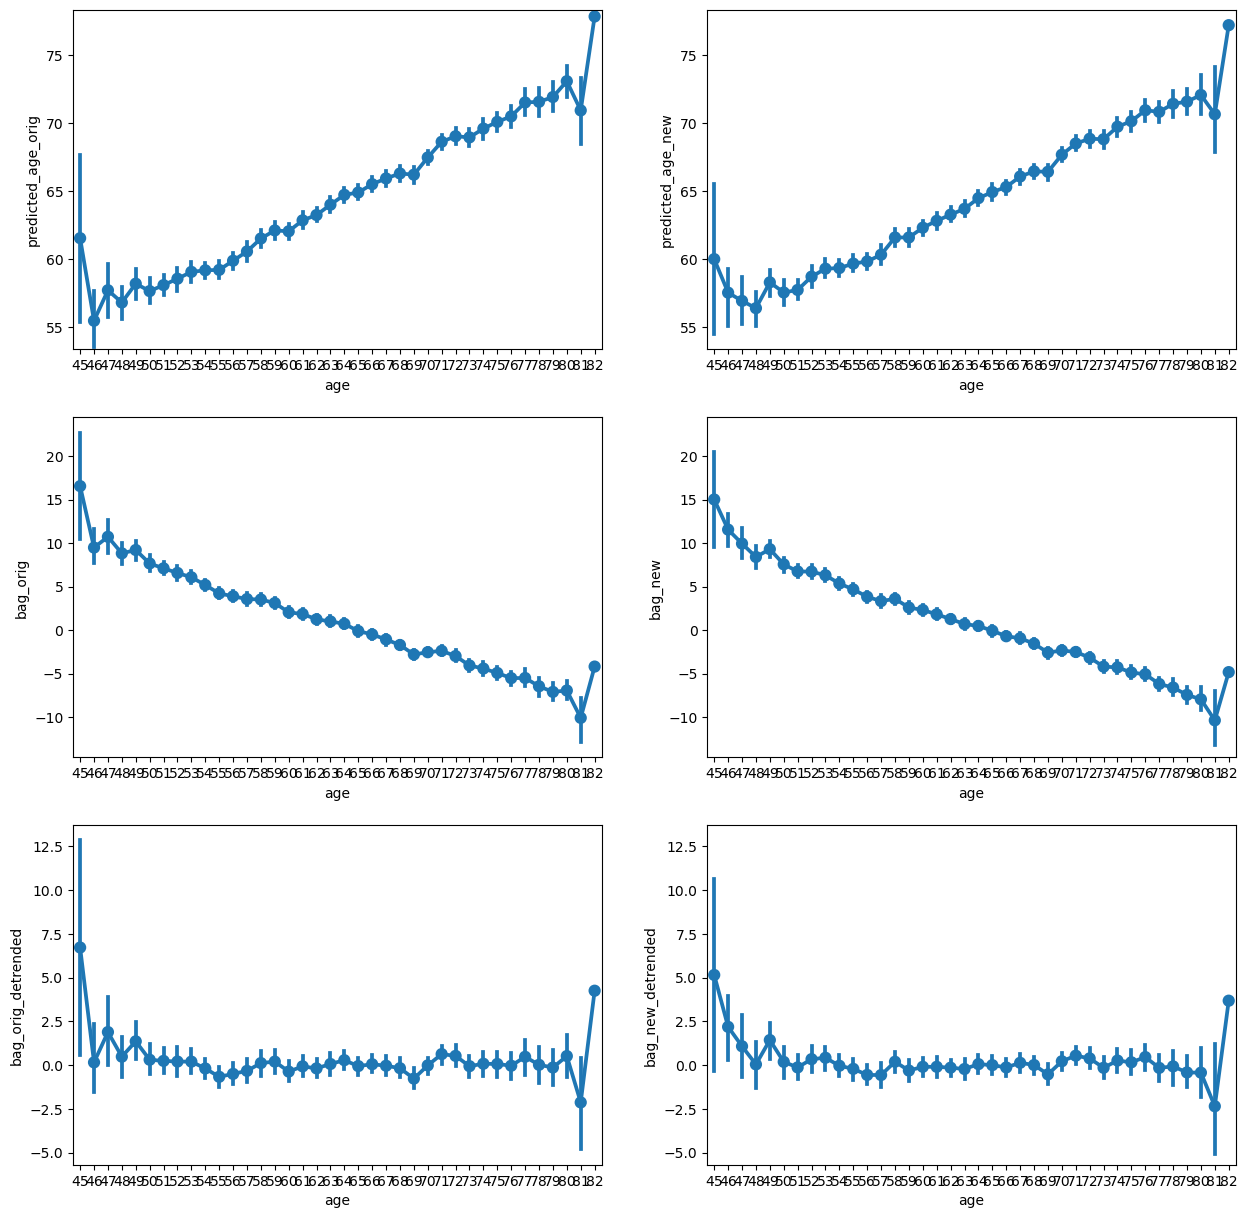

In [15]:
fig, axes = plt.subplots(3,2,figsize=(15, 15))
sns.pointplot(data=data_overview_heldout, x='age', y='predicted_age_orig', ax=axes[0,0])
sns.pointplot(data=data_overview_heldout, x='age', y='predicted_age_new', ax=axes[0,1])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_orig', ax=axes[1,0])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_new', ax=axes[1,1])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_orig_detrended', ax=axes[2,0])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_new_detrended', ax=axes[2,1])
# make y axes comparable
axes[0,0].sharey(axes[0,1])
axes[1,1].sharey(axes[1,0])
axes[2,1].sharey(axes[2,0])
fig.show()

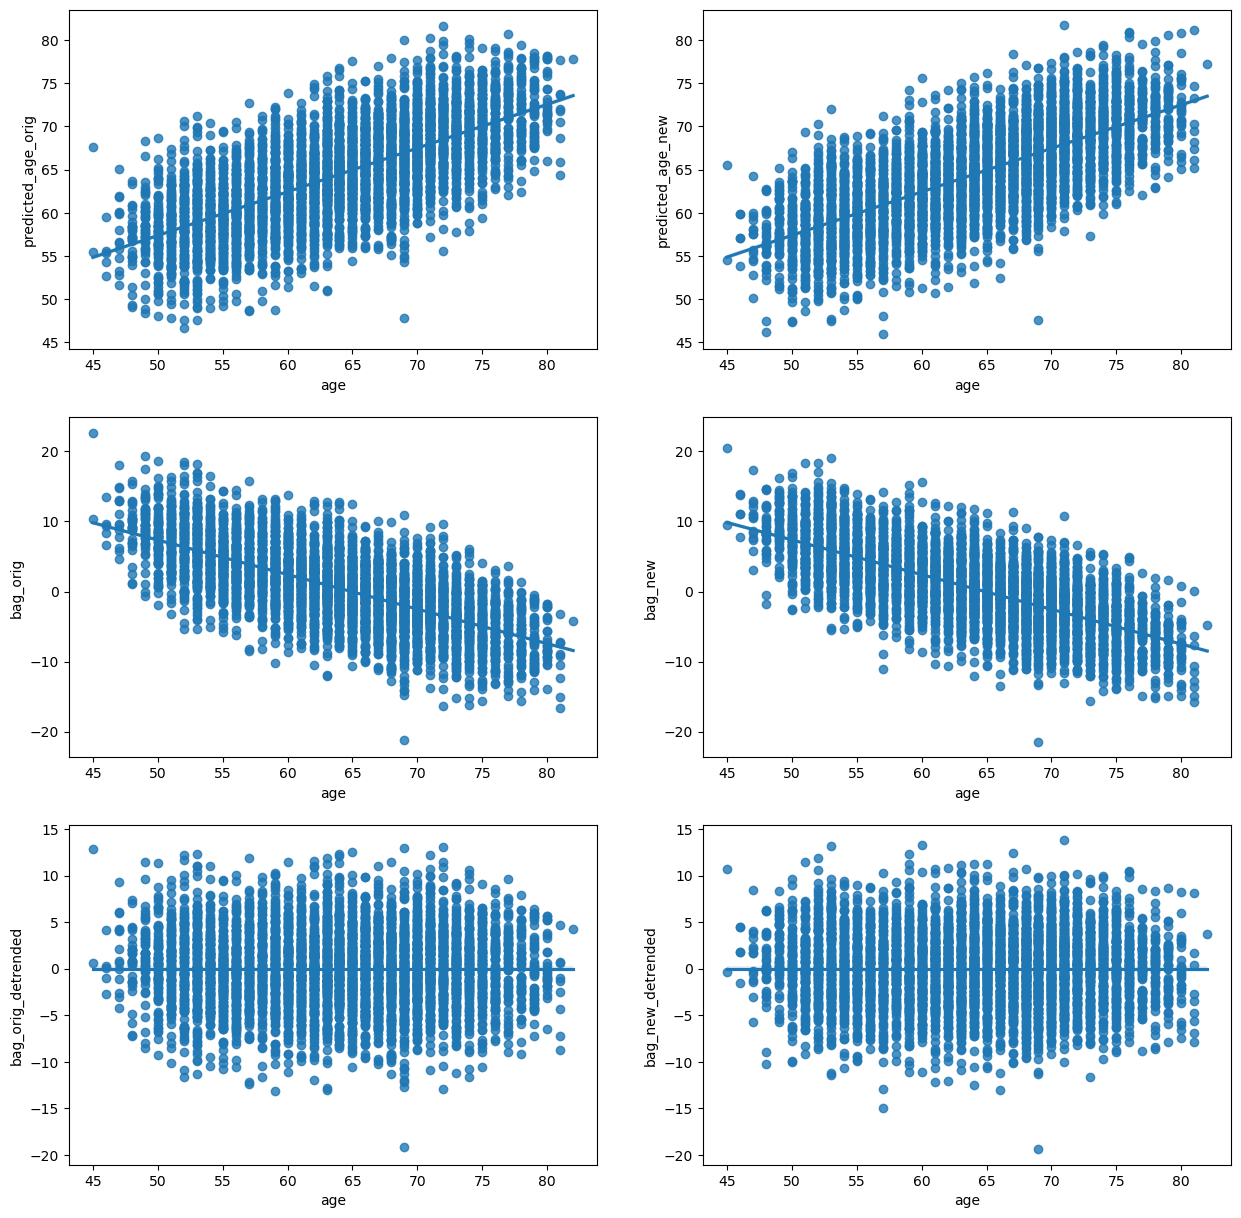

In [5]:
fig, axes = plt.subplots(3,2,figsize=(15, 15))
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_orig', ax=axes[0,0])
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_new', ax=axes[0,1])
sns.regplot(data=data_overview_heldout, x='age', y='bag_orig', ax=axes[1,0])
sns.regplot(data=data_overview_heldout, x='age', y='bag_new', ax=axes[1,1])
sns.regplot(data=data_overview_heldout, x='age', y='bag_orig_detrended', ax=axes[2,0])
sns.regplot(data=data_overview_heldout, x='age', y='bag_new_detrended', ax=axes[2,1])
# make y axes comparable
axes[0,0].sharey(axes[0,1])
axes[1,1].sharey(axes[1,0])
axes[2,1].sharey(axes[2,0])
fig.show()

In [5]:
# prepare variable columns for different plotting
binary_variables = ['depressive episode', 'recurrent depressive disorder', 
                     'all depression', 'multiple sclerosis', 'sex']
discrete_variables = ['digit substitution', 'education', 
                      'fluid intelligence', 'grip', 'weekly beer']
continuous_variables = ['bmi', 'genetic pc 1', 'genetic pc 2', 'genetic pc 3']

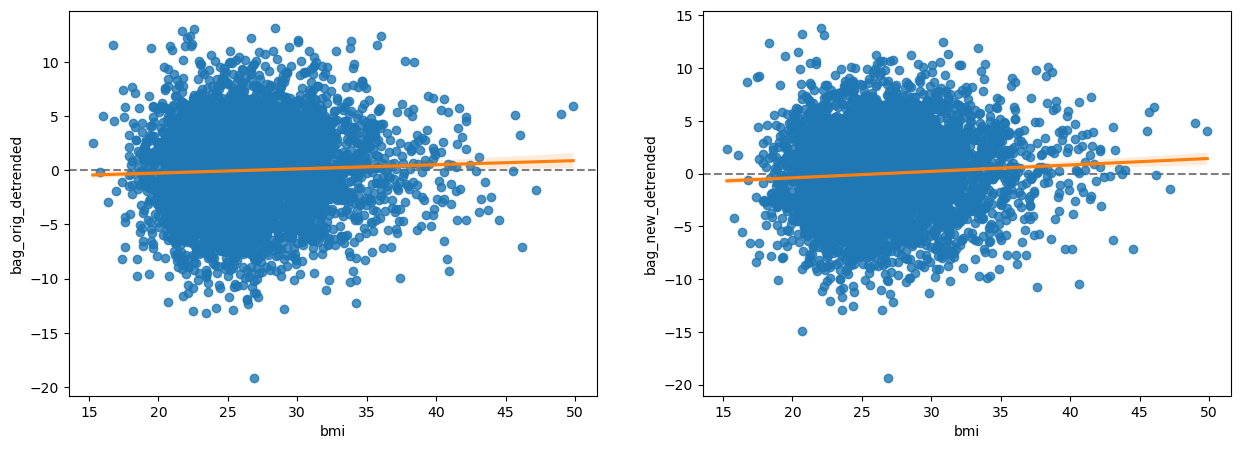

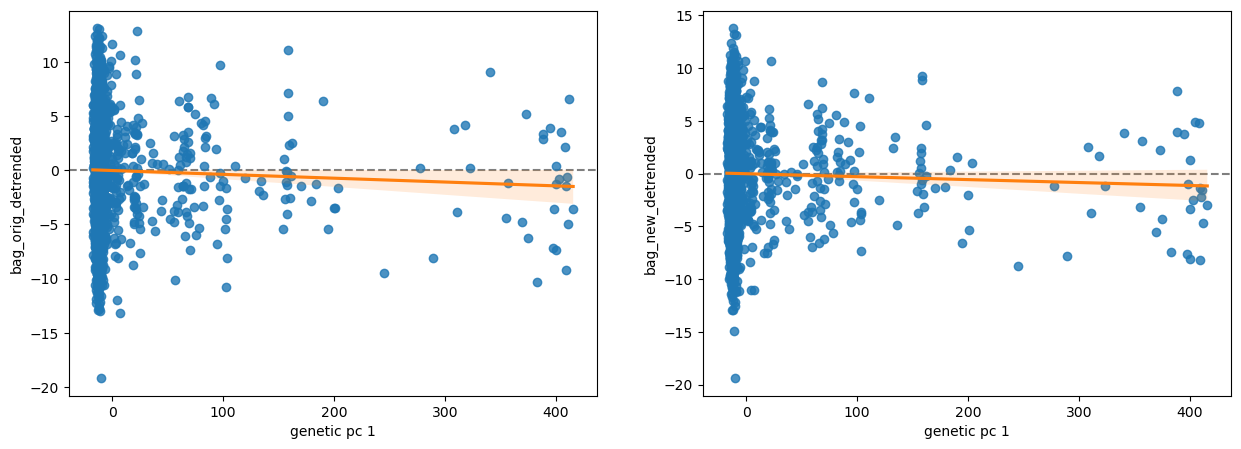

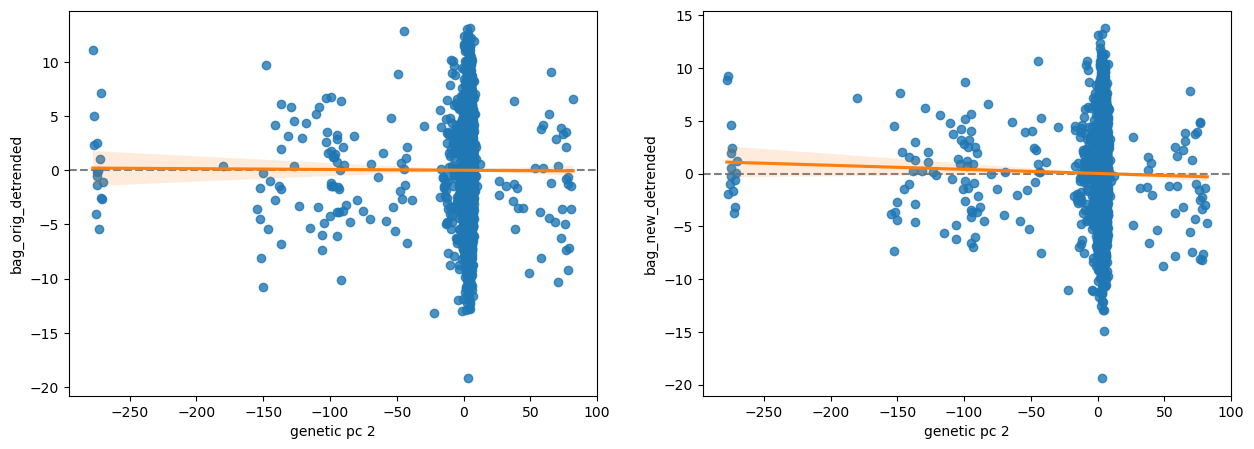

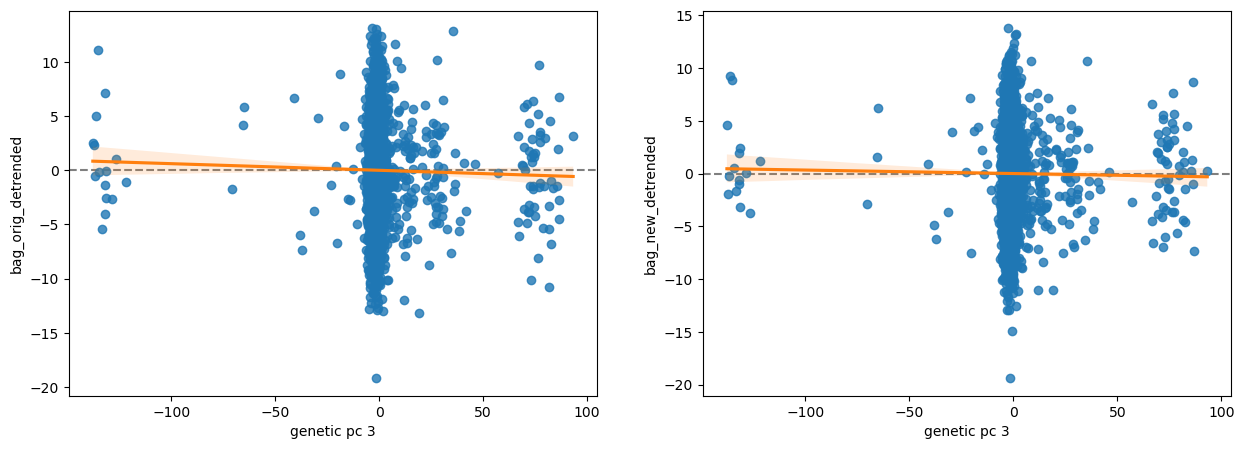

In [12]:
for column in continuous_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.regplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0], line_kws=dict(color='#ff7f0e'))
    sns.regplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1], line_kws=dict(color='#ff7f0e'))
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()

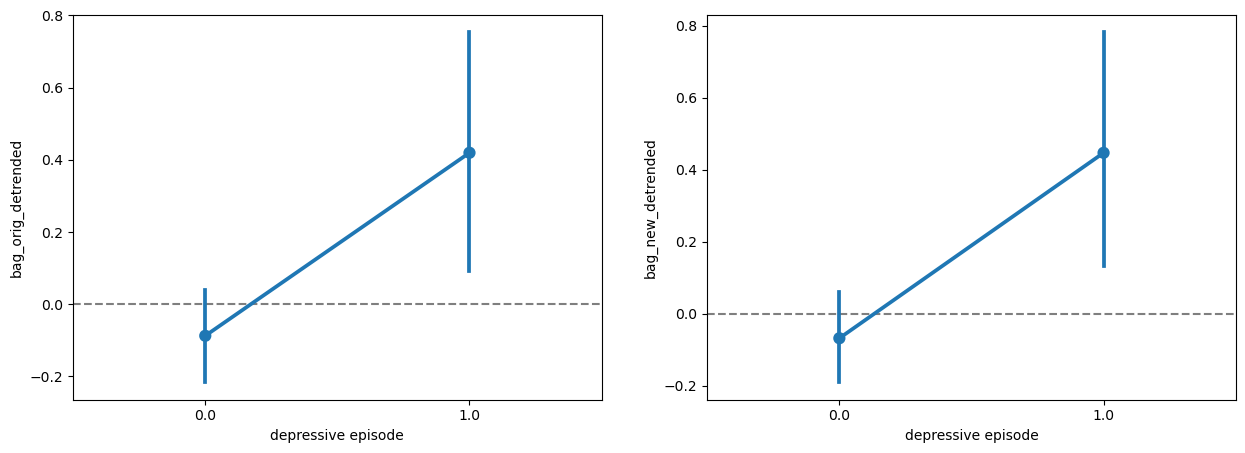

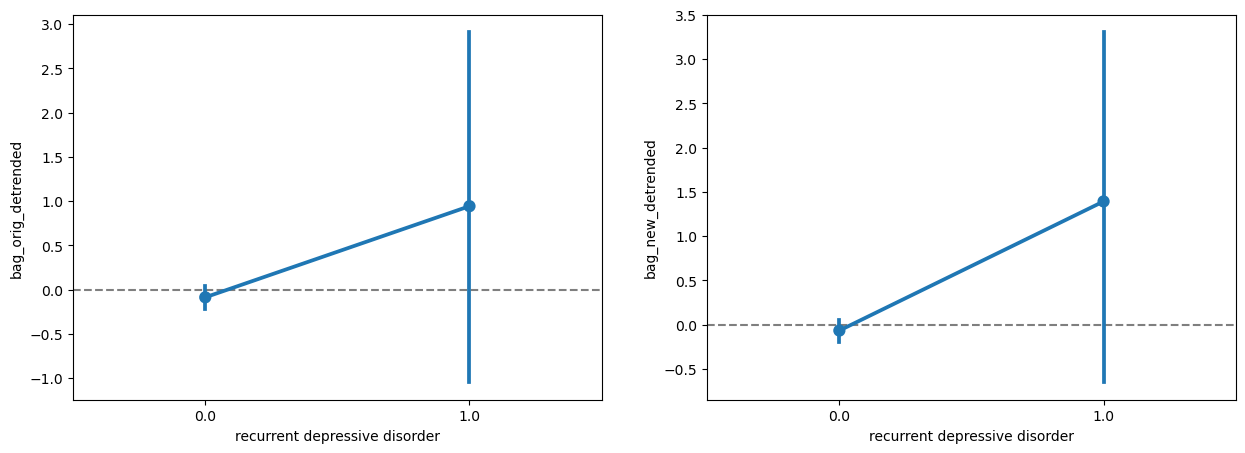

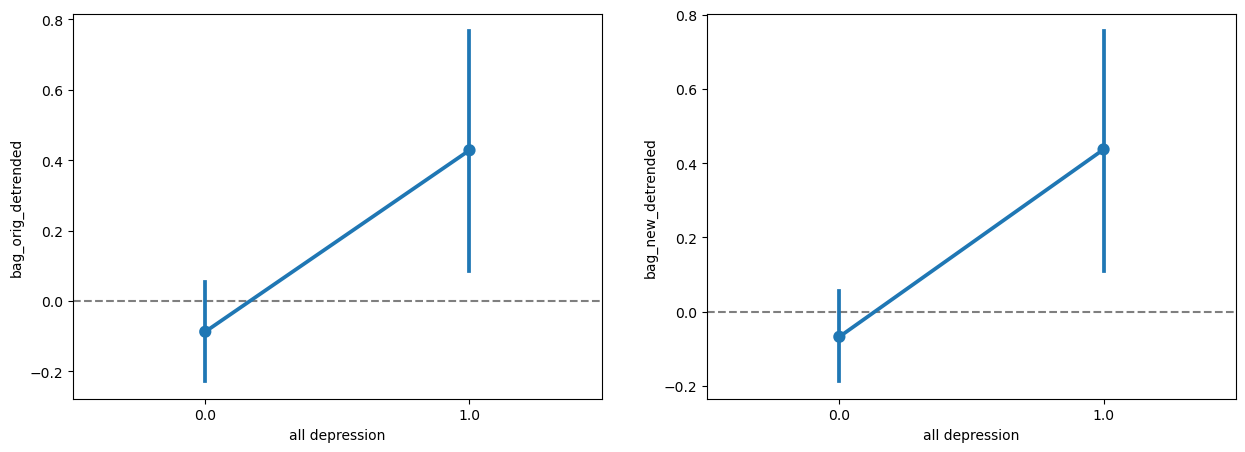

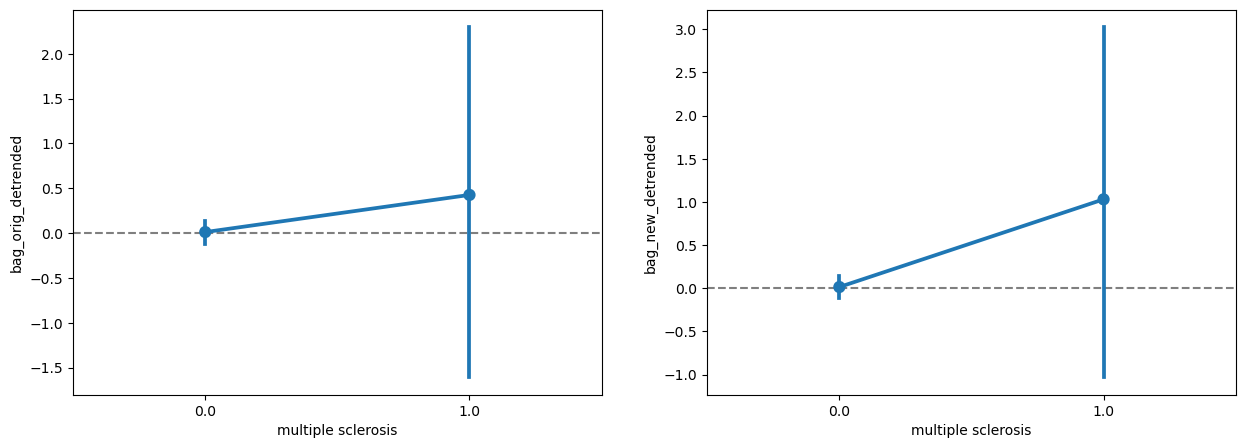

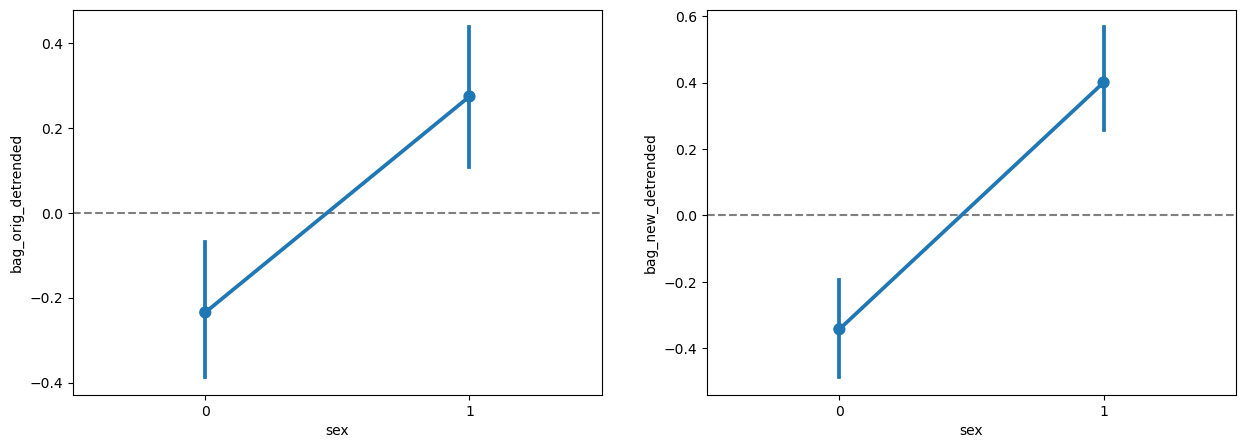

In [11]:
for column in binary_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.pointplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0])
    sns.pointplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1])
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()

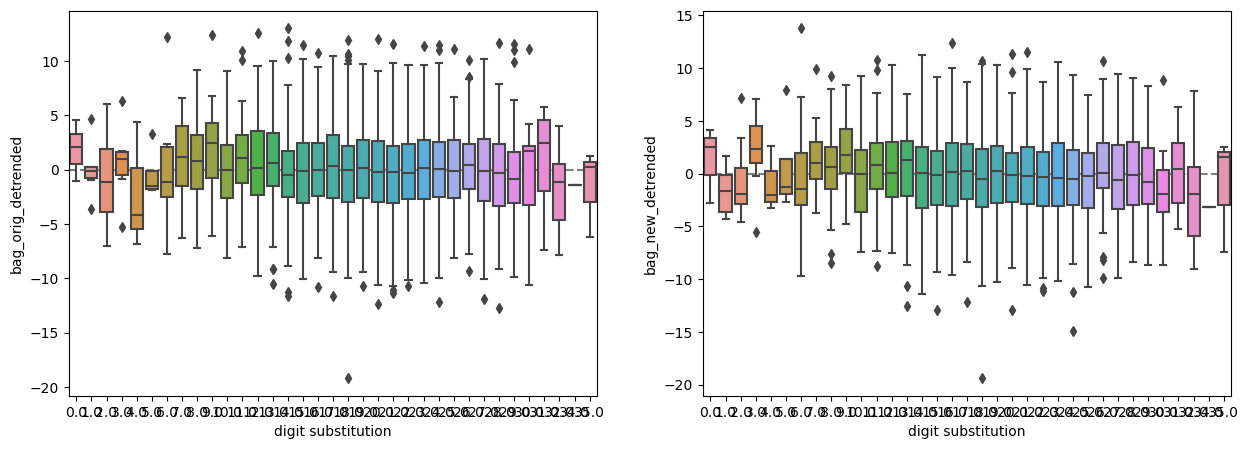

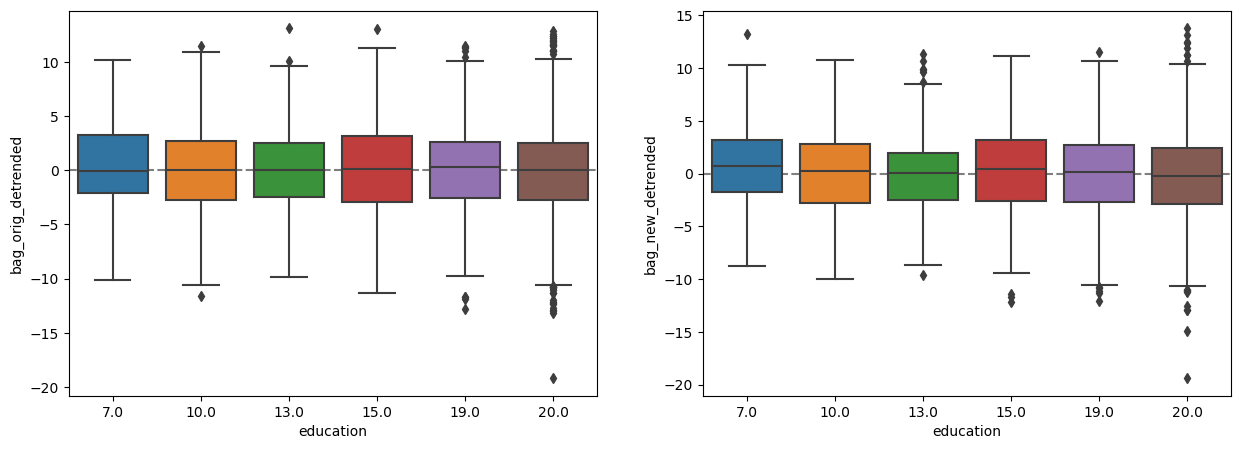

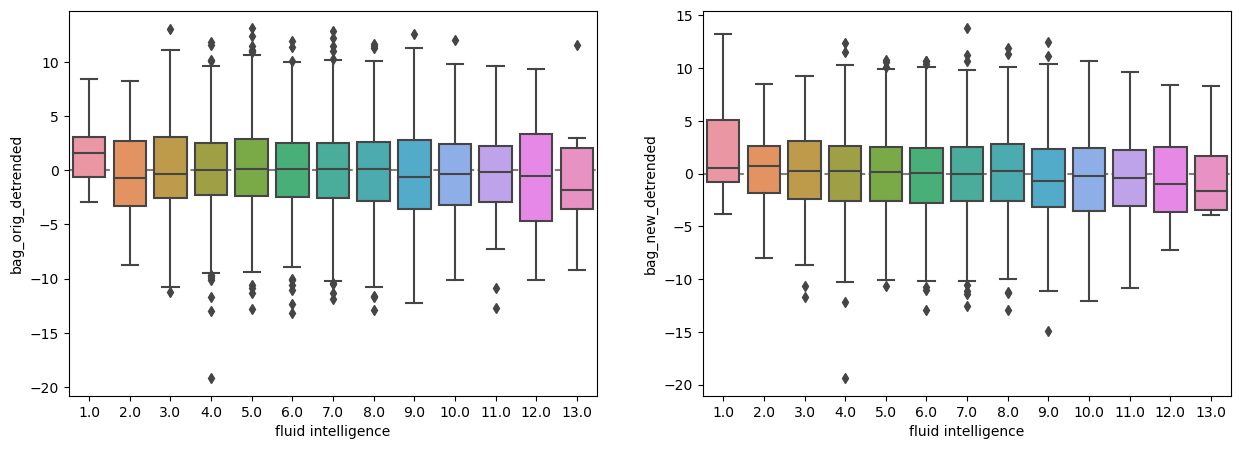

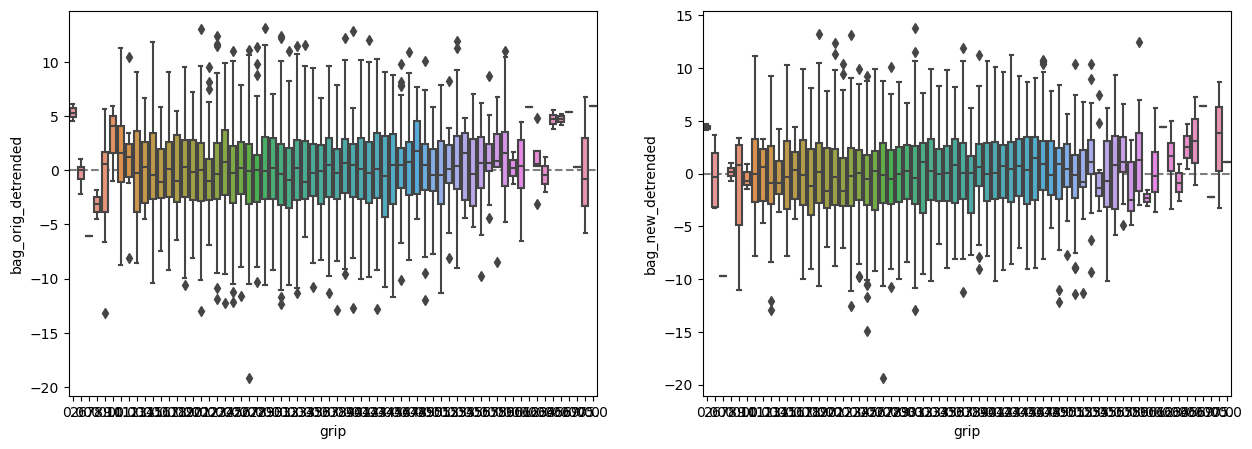

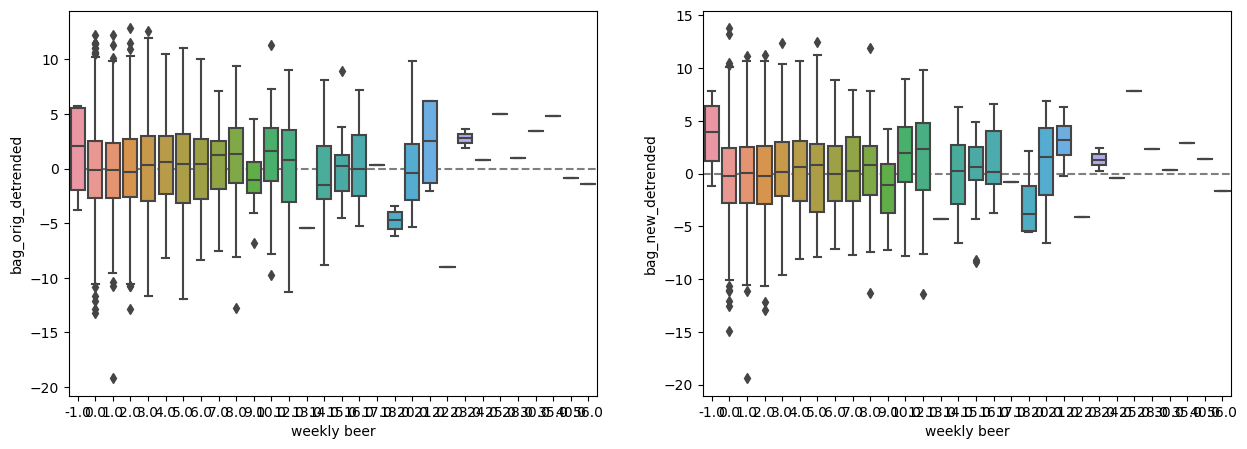

In [10]:
for column in discrete_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.boxplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0])
    sns.boxplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1])
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()